# Monterey Weather: Exploratory Data Visualization

In [142]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv('cleaned_df.csv', parse_dates=['datetime'], index_col=['datetime'])
df.head()

,DATE,HourlyPresentWeatherType,HourlySkyConditions,HourlyVisibility,HourlyDryBulbTemperature,HourlyWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,averageObscuration
datetime,,,,,,,,,,,
2009-04-01 00:08:00,2009-04-01T00:08:00,NaN,"[{'BKN': SkyCondition(obscuration=7, vertical_...",10.0,52.0,8.0,59.0,49.0,26.0,0.0,7.0
2009-04-01 00:50:00,2009-04-01T00:50:00,NaN,"[{'SCT': SkyCondition(obscuration=4, vertical_...",9.0,52.0,10.0,59.0,49.0,26.0,0.0,4.0
2009-04-01 00:54:00,2009-04-01T00:54:00,NaN,"[{'SCT': SkyCondition(obscuration=4, vertical_...",9.0,50.0,9.0,59.0,49.0,26.0,0.0,4.0
2009-04-01 01:54:00,2009-04-01T01:54:00,NaN,[],9.0,51.0,10.0,59.0,49.0,26.0,0.0,NaN
2009-04-01 02:54:00,2009-04-01T02:54:00,NaN,[],9.0,50.0,16.0,59.0,49.0,26.0,0.0,NaN


Event planners are often most concerned with the presence or absence of sun, which appears  in the dataset as the average sky obscuration value. Averaged across the whole dataset, which hours of the day tend to be more or less obscured?

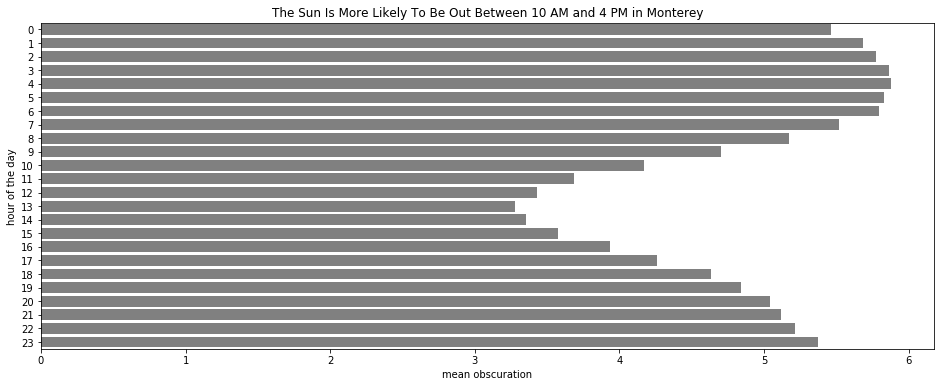

In [144]:
hourly_obscuration = pd.DataFrame(df.groupby(df.index.hour).averageObscuration.mean())
hourly_obscuration = hourly_obscuration.reset_index()
hourly_obscuration.columns = ['hour of the day', 'mean obscuration']
plt.figure(figsize=(16, 6))
sns.barplot(y='hour of the day', x='mean obscuration', color='grey', orient='h', data=hourly_obscuration).set_title('The Sun Is More Likely To Be Out Between 10 AM and 4 PM in Monterey')
plt.show()

It looks like the hours between 10 AM and 4 PM are the least obscured.

How varied is each hour's obscuration throughout the year?

In [181]:
hours = df
hours = pd.DataFrame(df.groupby([df.index.hour, df.index.day, df.index.month]).averageObscuration.mean())
hours.index = hours.index.set_names(['hour', 'day', 'month'])
hours.head(30)
midnight = hours.loc[0]
# sns.scatterplot(data=midnight)

pandas.core.frame.DataFrame

As another quick sanity check: the day of the week shouldn't matter —

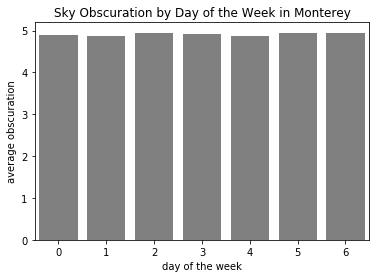

In [44]:
daily_obscuration = df.groupby(df.index.dayofweek).averageObscuration.mean()
daily_obscuration = daily_obscuration.reset_index()
daily_obscuration.columns = ['day of the week', 'average obscuration']
sns.barplot(x='day of the week', y='average obscuration', color='grey', data=daily_obscuration).set_title('Sky Obscuration by Day of the Week in Monterey')
plt.show()

As expected, we see little variation according to this variable.

Which months of the year are the most or least obscured?

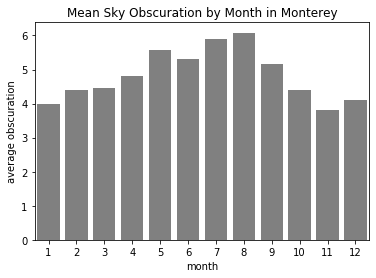

In [46]:
day_of_month = pd.DataFrame(df.groupby(df.index.month).averageObscuration.mean())
day_of_month = day_of_month.reset_index()
day_of_month.head()
day_of_month.columns = ['month', 'average obscuration']
sns.barplot(x='month', y='average obscuration', color='grey', data=day_of_month).set_title('Mean Sky Obscuration by Month in Monterey')
plt.show()

The data reveal the area's idiosyncratic weather patterns: the sky tends to be more obscured in the "summer" months and less obscured in the "fall" months. We can see this if we average obscuration by yearly quarter (as the idea of "seasons" doesn't quite map to this weather):

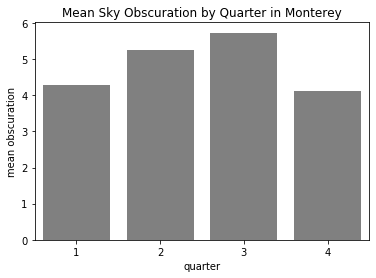

In [138]:
def quarter_from_month(datetime):
    month = datetime.month
    lookup = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 4, 11: 4, 12:4}
    return lookup[month]

by_quarter = df.reset_index()
by_quarter['quarter'] = by_quarter['datetime'].apply(quarter_from_month)
by_quarter = pd.DataFrame(by_quarter.groupby('quarter').averageObscuration.mean()).reset_index()
by_quarter.columns = ['quarter', 'mean obscuration']
sns.barplot(x='quarter', y='mean obscuration', color='grey', data=by_quarter).set_title('Mean Sky Obscuration by Quarter in Monterey')
plt.show()

How many calendar days on average have been clear or nearly clear over the last decade?

In [107]:
by_date = df.groupby([df.index.month, df.index.day]).averageObscuration.mean()
by_date = by_date.sort_values()
by_date = by_date[by_date <=3.5] # 3.5 is a conservative cut-off for a clear day: there are "few clouds" on average
print(str(len(by_date)) + " days have had an average obscuration rating of under 3.5 over the last decade.")
# by_date = by_date >=1
# by_date = by_date.sort_values()
# len(by_date)

36 days have had an average obscuration rating of under 3.5 over the last decade.


In [ ]:
plt.subplot()